# Temp 100 -> 0.1
Baza danych: order1.1
1000 iteracji
Wszystkie schematy chłodzenia

In [9]:
import tap_lib.Factory as fac
import tap_lib.Solver as sol
import tap_lib.Visualisation as vis
import tap_lib.Cooling as cool
import tap_lib.Probability as prob

import os

In [10]:
# zdefiniuj ścieżki do bazy danych
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
time_assignment_problem_directory = os.path.dirname(os.path.dirname(current_directory))

order1_db = os.path.join(time_assignment_problem_directory, "data", "factory_database", "order1.1.json")

results_directory = os.path.join(time_assignment_problem_directory, "tst_algorithm_properties", "results", "test_temp_100_0.1.csv")

In [11]:
# zainicjalizuj solver ze wszystkimi początkowymi parametrami
NUMBER_OF_SHOTS = 100
INIT_TEMP = 100
FINAL_TEMP = 0.1
MAX_ITER = 1000

solver = sol.Solver()
solver.SolutionType=fac.FactoryAssignmentSchedule
solver.cost=fac.get_cost
solver.sol_gen=fac.random_neighbour
solver.probability=prob.exponential
solver.init_sol = fac.generate_starting_solution(order1_db)
solver.init_temp=INIT_TEMP
solver.max_iterations=MAX_ITER
solver.log_results=True
solver.csv_file_path = results_directory
solver.remember_visited_solution=False

scope = None

In [12]:
# zainicjalizuj schematy chłodzenia
linear = cool.cooling_factory(INIT_TEMP, FINAL_TEMP, MAX_ITER, cool.CoolingTypes.LIN)
exponent = cool.cooling_factory(INIT_TEMP, FINAL_TEMP, MAX_ITER, cool.CoolingTypes.EXP)
log = cool.cooling_factory(INIT_TEMP, FINAL_TEMP, MAX_ITER, cool.CoolingTypes.LOG)
poly = cool.cooling_factory(INIT_TEMP, FINAL_TEMP, MAX_ITER, cool.CoolingTypes.POLY, poly=5)

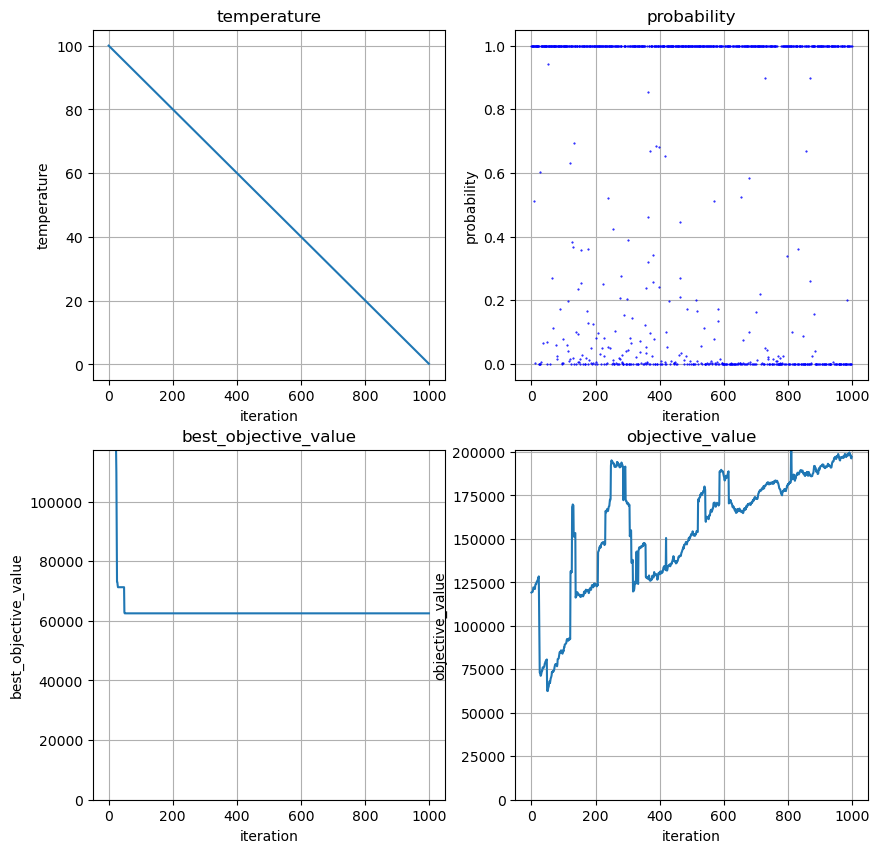

In [13]:
solver.experiment_name = 'test_temp_100_to_0.1_linear'
solver.cool = linear

for _ in range(NUMBER_OF_SHOTS):
    solution, scope = solver.simulate_annealing()
vis.plot_scope(scope)

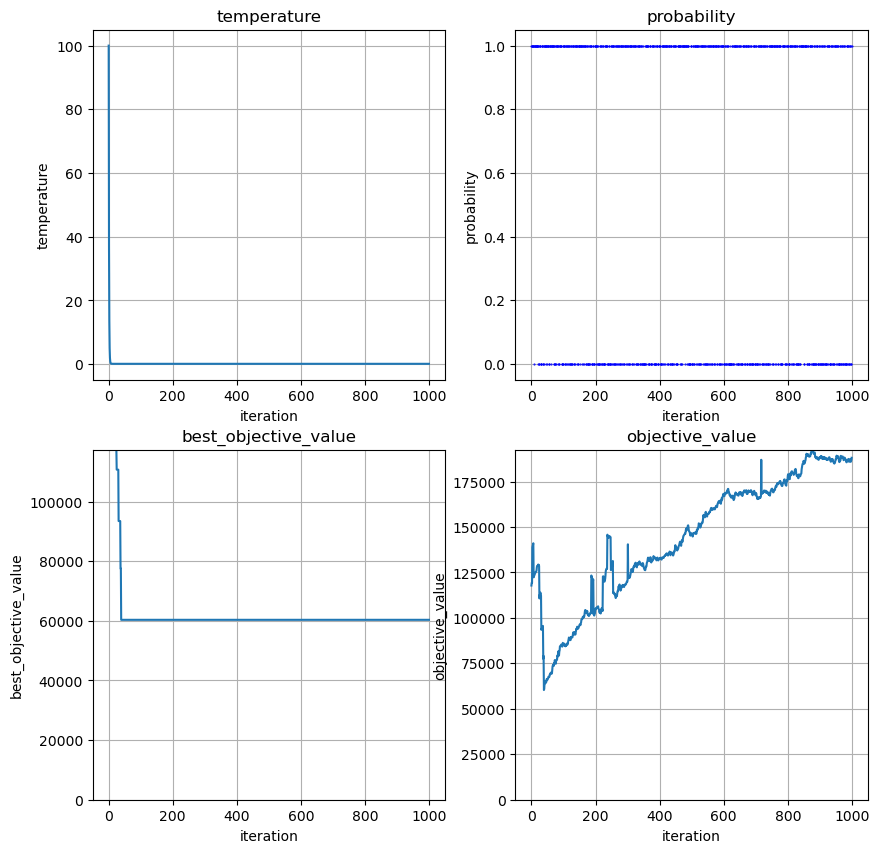

In [14]:
solver.experiment_name = 'test_temp_100_to_0.1_exponential'
solver.cool = exponent

for _ in range(NUMBER_OF_SHOTS):
    solution, scope = solver.simulate_annealing()
vis.plot_scope(scope)

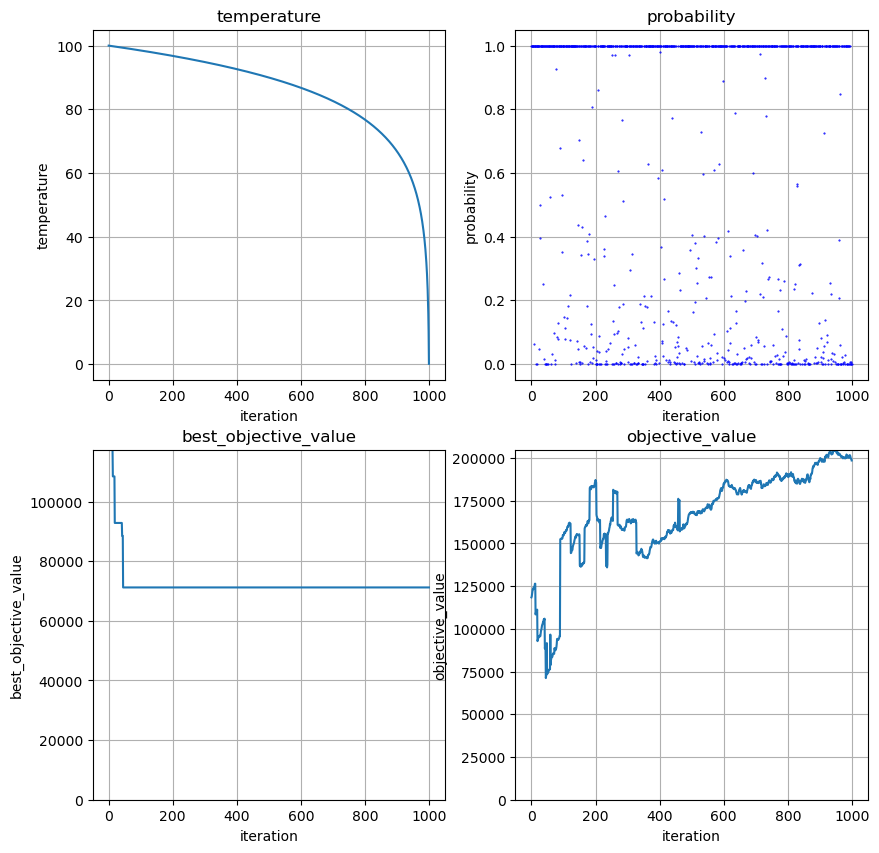

In [15]:
solver.experiment_name = 'test_temp_100_to_0.1_logarithmic'
solver.cool = log

for _ in range(NUMBER_OF_SHOTS):
    solution, scope = solver.simulate_annealing()
vis.plot_scope(scope)

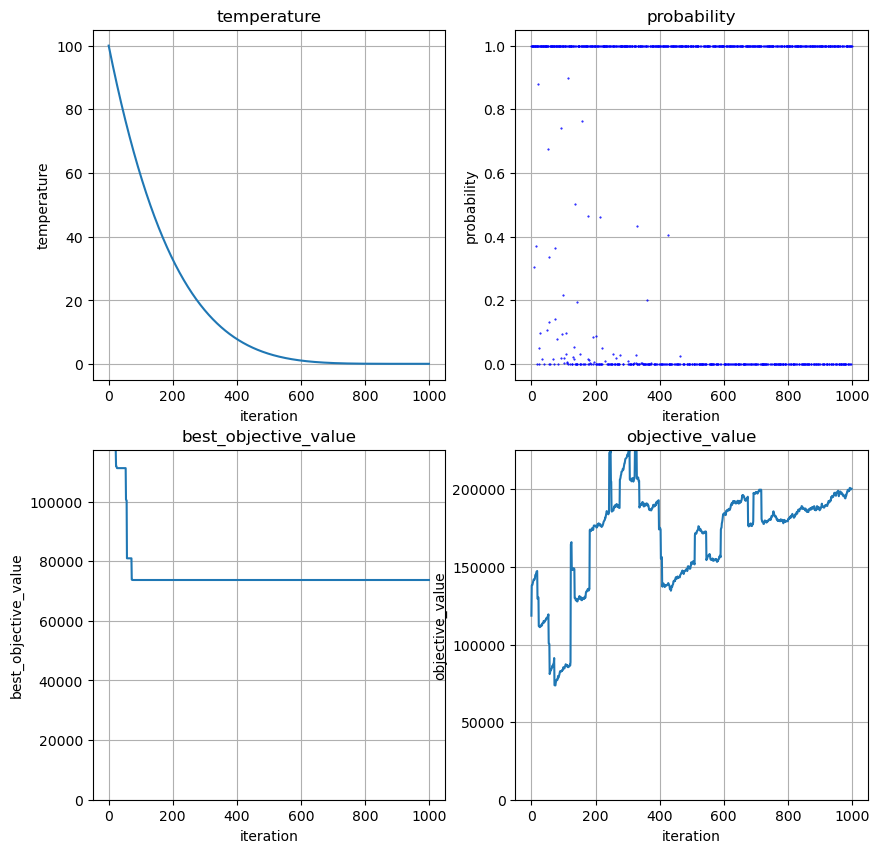

In [16]:
solver.experiment_name = 'test_temp_100_to_0.1_polynomial'
solver.cool = poly

for _ in range(NUMBER_OF_SHOTS):
    solution, scope = solver.simulate_annealing()
vis.plot_scope(scope)